### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("data/bad_data/unknown_country_location.csv")

In [3]:
df 

,Unnamed: 0,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
0,37,1950,1953-06-16,NaN,"Mount Phou-Lassy, French Indo-China",Aigle Azur,NaN,Vientiane - Saigon,Douglas DC-3,F-BEST,19100,"{'total': 34, 'passengers': 31, 'crew': 3}","{'total': 34, 'passengers': 31, 'crew': 3}",0.0,Crashed after on-board fire. Possibly shot down.,34,34,Aigle Azur,"Mount Phou-Lassy, French Indo-China"
1,40,1950,1953-07-12,0841,"Pacific Ocean, 325 miles east of Wake Island",Transocean Air Lines,512,Wake Island - Honolulu - Oakland,Douglas DC-6A,N90806,42901/153,"{'total': 58, 'passengers': 50, 'crew': 8}","{'total': 58, 'passengers': 50, 'crew': 8}",0.0,Lost at sea while en route from Wake Island to...,58,58,Transocean Air Lines,"Pacific Ocean, 325 miles east of Wake Island"
2,45,1950,1953-08-05,NaN,Off Irish coast,Military - U.S. Air Force,NaN,Travis - Lakenheath,Convair B-36,52-1369,303,"{'total': 23, 'passengers': 0, 'crew': 23}","{'total': 19, 'passengers': 0, 'crew': 19}",0.0,Crashed into the Atlantic Ocean after two of i...,23,19,Military,Off Irish coast
3,112,1940,1947-06-21,NaN,"Black Sea, Gulf of Karkinitsky",Aeroflot,NaN,NaN,Li-2,CCCP-L4138,NaN,"{'total': 29, 'passengers': 25, 'crew': 4}","{'total': 8, 'passengers': 6, 'crew': 2}",0.0,The plane ditched in the Black Sea. Engine fai...,29,8,Aeroflot,"Black Sea, Gulf of Karkinitsky"
4,113,1940,1947-07-01,NaN,"Near Eaeka, French Cameroons",Air France,NaN,Bangu i- Yaoundé - Douala,Junkers JU-52/3m,F-BALF,091,"{'total': 13, 'passengers': 10, 'crew': 3}","{'total': 13, 'passengers': 10, 'crew': 3}",0.0,Crashed into the slope of a mountain while en ...,13,13,Air France,"Near Eaeka, French Cameroons"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,4455,1940,1949-01-17,c 13:40,"Atlantic Ocean, off Bermuda",British South American Airways,NaN,Bermuda - Kingston,Avro 688 Tudor 4B,G-AGRE,1253,"{'total': 20, 'passengers': 13, 'crew': 7}","{'total': 20, 'passengers': 13, 'crew': 7}",0.0,Lost at sea on a flight from Bermuda to Kingst...,20,20,British South American Airways,"Atlantic Ocean, off Bermuda"
93,4473,1940,1949-05-07,16:00,"Sibuyan Sea, off the Philippine island of Elalat",Philippine Air Lines,NaN,Daet - Manila,Douglas DC-3,PI-C-98,16743/33491,"{'total': 13, 'passengers': 10, 'crew': 3}","{'total': 13, 'passengers': 10, 'crew': 3}",0.0,"The plane was on a flight from Daet, Camarines...",13,13,Philippine Air Lines,"Sibuyan Sea, off the Philippine island of Elalat"
94,4570,1960,1961-01-22,0304,Midway Island Naval Air Station,Military - U.S. Navy,NaN,Survey,Lockheed WV-2 Super Constellation,BU143193,4467,"{'total': 22, 'passengers': 0, 'crew': 22}","{'total': 6, 'passengers': 0, 'crew': 6}",3.0,While returning from an aborted barrier missio...,22,6,Military,Midway Island Naval Air Station
95,4653,1970,1977-06-21,2230,Off Wake Island,Military - U.S. Navy,NaN,Wake-Agana,Lockheed EC-130Q,156176,4280,"{'total': 16, 'passengers': 0, 'crew': 16}","{'total': 16, 'passengers': 0, 'crew': 16}",0.0,Crashed into the Pacific Ocean and exploded mo...,16,16,Military,Off Wake Island


In [4]:
df = pd.read_csv("data/ready_for_plotting/data_plot_map.csv")
df.Date = pd.to_datetime(df.Date)

In [5]:
df.columns = ['Decade', 'Date', 'Time', 'Location', 'Operator', 'Flight_Num', 'Route',
       'Ac_Type', 'Registration', 'Cn_Ln', 'Aboard', 'Fatalities', 'Ground',
       'Summary', 'Aboard_Total', 'Fatalities_Total', 'Operator_Military_Compiled',
       'Country_location', 'Code', 'Country_Geopy']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Decade                      5013 non-null   int64         
 1   Date                        5013 non-null   datetime64[ns]
 2   Time                        3526 non-null   object        
 3   Location                    5013 non-null   object        
 4   Operator                    5002 non-null   object        
 5   Flight_Num                  1339 non-null   object        
 6   Route                       4267 non-null   object        
 7   Ac_Type                     5000 non-null   object        
 8   Registration                4750 non-null   object        
 9   Cn_Ln                       4361 non-null   object        
 10  Aboard                      5013 non-null   object        
 11  Fatalities                  5013 non-null   object      

In [7]:
df["country"] = df.Country_Geopy.apply(lambda x : x.split(",")[-1].strip())

In [8]:
group_by_county = df.groupby("country")

In [9]:
df

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_Military_Compiled,Country_location,Code,Country_Geopy,country
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,...,"{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom",United Kingdom
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,...,"{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States",United States
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,...,"{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States",United States
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,...,"{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy,Italy
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,...,"{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy",Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,NaN,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,...,"{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot,"{'place_id': 224774650, 'licence': 'Data © Ope...",RUS,"Siberian Federal District, Russia",Russia
5009,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,...,"{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot,"{'place_id': 202588741, 'licence': 'Data © Ope...",UKR,"Kyiv, Ukraine",Ukraine
5010,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,NaN,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,...,"{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope...",RUS,Russia,Russia
5011,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,...,"{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir,"{'place_id': 253308938, 'licence': 'Data © Ope...",THA,Thailand,Thailand


In [10]:
agg_me = {'Country_Geopy':'count','Aboard_Total':'sum', 'Fatalities_Total':'sum','Ground':'sum'}
rename_me = {'Country_Geopy': 'Total_Crashes', 'Aboard_Total': 'Total_Aboard', 'Fatalities_Total': 'Fatalities_Plane', 'Ground': 'Fatalities_Ground'}

In [11]:
group_by_county.agg(agg_me).sort_values('Country_Geopy',ascending=False)[:20].rename(columns=rename_me)

,Total_Crashes,Total_Aboard,Fatalities_Plane,Fatalities_Ground
country,,,,
United States,1087,26713,15663,5929.0
Russia,260,10963,8563,90.0
Brazil,179,4576,3205,65.0
Canada,160,3211,2192,15.0
Colombia,157,3524,3072,38.0
United Kingdom,144,3593,2614,121.0
France,138,3787,3077,32.0
Germany,129,3408,2847,66.0
India,108,3695,2890,195.0


In [12]:
df[df.Date == "2001-09-11"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_Military_Compiled,Country_location,Code,Country_Geopy,country
2737,2000,2001-09-11,0945,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,...,"{'total': 64, 'passengers': 58, 'crew': 6}",125.0,The aircraft was hijacked after taking off fro...,64,64,American Airlines,"{'place_id': 4249947, 'licence': 'Data © OpenS...",USA,"Virginia, United States",United States
2738,2000,2001-09-11,0847,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,...,"{'total': 92, 'passengers': 81, 'crew': 11}",2750.0,The aircraft was hijacked shortly after it lef...,92,92,American Airlines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",United States
2739,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,...,"{'total': 65, 'passengers': 56, 'crew': 9}",2750.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",United States
2740,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,...,"{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines,"{'place_id': 6167425, 'licence': 'Data © OpenS...",USA,"Pennsylvania, United States",United States


In [13]:
df.loc[2738, "Ground"] = 1375
df.loc[2739, "Ground"] = 1375

In [14]:
df[:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_Military_Compiled,Country_location,Code,Country_Geopy,country
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,...,"{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom",United Kingdom
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,...,"{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States",United States
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,...,"{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States",United States
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,...,"{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy,Italy
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,...,"{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy",Italy


In [15]:
group_by_county.agg(agg_me).sort_values('Country_Geopy',ascending=False)[:20].rename(columns=rename_me)

,Total_Crashes,Total_Aboard,Fatalities_Plane,Fatalities_Ground
country,,,,
United States,1087,26713,15663,3179.0
Russia,260,10963,8563,90.0
Brazil,179,4576,3205,65.0
Canada,160,3211,2192,15.0
Colombia,157,3524,3072,38.0
United Kingdom,144,3593,2614,121.0
France,138,3787,3077,32.0
Germany,129,3408,2847,66.0
India,108,3695,2890,195.0


In [16]:
dfUSA = df[df.Code == "USA"]

In [17]:
dfUSA["state"]= dfUSA.Country_Geopy.apply(lambda x:x.split(",")[0].strip())

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_14633/835723665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUSA["state"]= dfUSA.Country_Geopy.apply(lambda x:x.split(",")[0].strip())


In [18]:
dfUSA[dfUSA.Date == "2001-09-11"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_Military_Compiled,Country_location,Code,Country_Geopy,country,state
2737,2000,2001-09-11,0945,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,...,125.0,The aircraft was hijacked after taking off fro...,64,64,American Airlines,"{'place_id': 4249947, 'licence': 'Data © OpenS...",USA,"Virginia, United States",United States,Virginia
2738,2000,2001-09-11,0847,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,...,1375.0,The aircraft was hijacked shortly after it lef...,92,92,American Airlines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",United States,New York
2739,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,...,1375.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines,"{'place_id': 371663561, 'licence': 'Data © Ope...",USA,"New York, United States",United States,New York
2740,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,...,0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines,"{'place_id': 6167425, 'licence': 'Data © OpenS...",USA,"Pennsylvania, United States",United States,Pennsylvania


In [19]:
group_by_USA = dfUSA.groupby("state")

In [20]:
agg_me_state = {'state':'count','Aboard_Total':'sum','Fatalities_Total':'sum','Ground':'sum'}
rename_me_state = {'state': 'Total_Crashes', 'Aboard_Total': 'Total_Aboard', 'Fatalities_Total': 'Fatalities_Plane', 'Ground': 'Fatalities_Ground'}

In [21]:
group_by_USA.agg(agg_me_state).rename(columns=rename_me_state).sort_values("Total_Crashes",ascending=False)[:20]

,Total_Crashes,Total_Aboard,Fatalities_Plane,Fatalities_Ground
state,,,,
California,124,3769,1673,86.0
Alaska,107,1678,1026,0.0
New York,59,3098,1623,2778.0
Texas,50,942,635,1.0
Ohio,44,355,229,0.0
New Jersey,38,735,472,13.0
Florida,37,1255,607,1.0
Illinois,35,1089,665,14.0
Pennsylvania,32,745,446,2.0


In [22]:
def change_usa(x):
    if isinstance(x,str) and "Military - U.S" in x:
        return "Military - U.S"
    else: return x

In [23]:
df["Operator_USA_Combined"] = df.Operator.apply(change_usa)

In [24]:
group_by_operator = df.groupby("Operator_USA_Combined")

In [25]:
df[:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_Military_Compiled,Country_location,Code,Country_Geopy,country,Operator_USA_Combined
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,...,0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom",United Kingdom,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,...,0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States",United States,Flying Tiger Line
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,...,0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States",United States,Associated Air Transport
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,...,0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy,Italy,Military -Royal Air Force
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,...,0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy",Italy,Linee Aeree Italiane


In [26]:
agg_me_operator = {'Operator':'count','Aboard_Total':'sum', 'Fatalities_Total':'sum','Ground':'sum'}
rename_me_operator = {'Operator': 'Total_Crashes', 'Aboard_Total': 'Total_Aboard', 'Fatalities_Total': 'Fatalities_Plane', 'Ground': 'Fatalities_Ground'}

In [27]:
plot_operator_bars_crashes = group_by_operator.agg(agg_me_operator).rename(columns=rename_me_operator).sort_values("Total_Crashes")[-10:]

In [28]:
plot_operator_bars_crashes

,Total_Crashes,Total_Aboard,Fatalities_Plane,Fatalities_Ground
Operator_USA_Combined,,,,
Indian Airlines,34,1451,860,7.0
US Aerial Mail Service,35,42,39,0.0
China National Aviation Corporation,37,417,331,0.0
American Airlines,38,2200,1422,1514.0
Pan American World Airways,41,3097,1303,20.0
United Air Lines,44,2461,1019,1378.0
Deutsche Lufthansa,62,499,383,0.0
Air France,73,2978,1797,8.0
Aeroflot,251,11133,8704,35.0


In [29]:
def plot_by_operator(plot_operator_bars,label):


    x = np.arange(len(plot_operator_bars)) # the label locations
    width = 0.45 # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.barh(x + width/2, plot_operator_bars.Fatalities_Plane, width, label="Fatalities", color="teal")
    rects2 = ax.barh(x - width/2, plot_operator_bars.Total_Crashes, width, label="Crashes",color="orchid")
    ax.set_xscale('log')
    ax.set_yticks(x+width/2)
    ax.set_yticklabels(plot_operator_bars.index)
    ax.set_xlabel("Count")
    ax.set_title(f"By {label}".title())
    ax.legend()

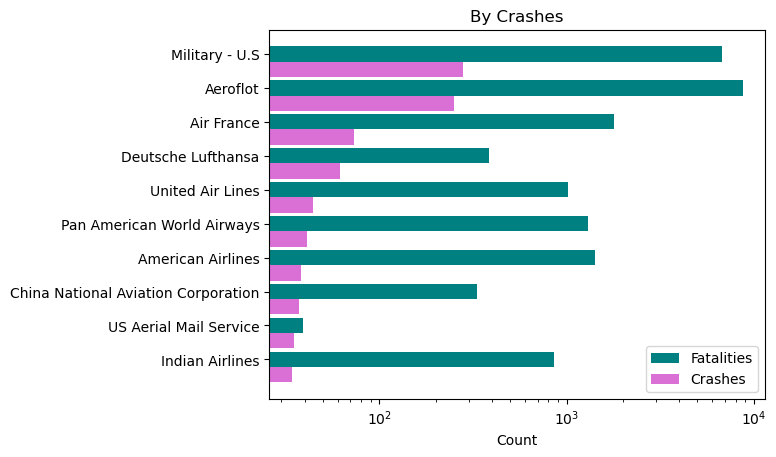

In [30]:
plot_by_operator(plot_operator_bars_crashes,"crashes")

In [31]:
rename_me_operator

{'Operator': 'Total_Crashes',
 'Aboard_Total': 'Total_Aboard',
 'Fatalities_Total': 'Fatalities_Plane',
 'Ground': 'Fatalities_Ground'}

In [32]:
plot_operator_bars_fatalities = group_by_operator.agg(agg_me_operator).rename(columns=rename_me_operator).sort_values("Fatalities_Plane")[-10:]
plot_operator_bars_fatalities

,Total_Crashes,Total_Aboard,Fatalities_Plane,Fatalities_Ground
Operator_USA_Combined,,,,
China Airlines (Taiwan),14,1590,847,7.0
Indian Airlines,34,1451,860,7.0
Turkish Airlines (THY),13,956,890,0.0
AVIANCA,24,1067,941,3.0
United Air Lines,44,2461,1019,1378.0
Pan American World Airways,41,3097,1303,20.0
American Airlines,38,2200,1422,1514.0
Air France,73,2978,1797,8.0
Military - U.S,280,7824,6738,328.0


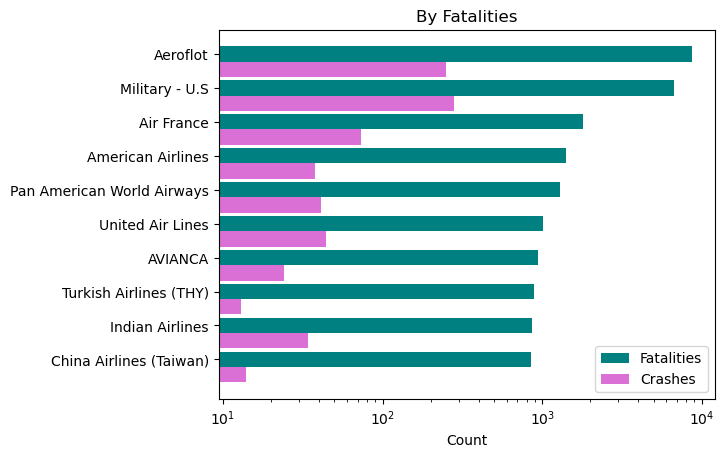

In [33]:
plot_by_operator(plot_operator_bars_fatalities,"Fatalities")

In [34]:
df[:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,...,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_Military_Compiled,Country_location,Code,Country_Geopy,country,Operator_USA_Combined
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,NaN,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,...,0.0,Crashed into approach lights while attempting ...,35,27,British European Airways,"{'place_id': 372303099, 'licence': 'Data © Ope...",GBR,"Northern Ireland, United Kingdom",United Kingdom,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,...,0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line,"{'place_id': 383391892, 'licence': 'Data © Ope...",USA,"Washington, United States",United States,Flying Tiger Line
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,...,0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport,"{'place_id': 315821592, 'licence': 'Data © Ope...",USA,"Idaho, United States",United States,Associated Air Transport
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,NaN,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,NaN,...,0.0,Both aircraft crashed after a midair collision...,26,26,Military,"{'place_id': 100666283, 'licence': 'Data © Ope...",ITA,Italy,Italy,Military -Royal Air Force
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,NaN,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,...,0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane,"{'place_id': 78523394, 'licence': 'Data © Open...",ITA,"Sardinia, Italy",Italy,Linee Aeree Italiane


In [35]:
df["Death_Ratio"] = df["Fatalities_Total"] / df["Aboard_Total"]

In [36]:
df_grouped = df.groupby(df.Date.dt.to_period('y'))

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_14633/218152184.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_grouped = df.groupby(df.Date.dt.to_period('y'))


In [37]:
df_grouped.agg(agg_me)

,Country_Geopy,Aboard_Total,Fatalities_Total,Ground
Date,,,,
1908,1,2,1,0.0
1909,1,1,1,0.0
1912,1,5,5,0.0
1913,3,49,43,0.0
1915,2,60,36,0.0
...,...,...,...,...
2020,8,703,355,1.0
2021,9,247,185,3.0
2022,6,321,189,2.0


In [38]:
df_grouped = df.groupby(df.Date.dt.to_period('y'))

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_14633/218152184.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_grouped = df.groupby(df.Date.dt.to_period('y'))


In [39]:
df_grouped_usa = df.groupby(df[df.Code == "USA"].Date.dt.to_period('y'))

/var/folders/sr/32z6khr97xs2g11w52pbkzww0000gn/T/ipykernel_14633/1998572463.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_grouped_usa = df.groupby(df[df.Code == "USA"].Date.dt.to_period('y'))


In [40]:
def plot_(df_location,df_fatalities,df_aboard,df_ground):
    fig, ax = plt.subplots(3,1, figsize=(24, 12))
    # Plotting as time series
    df_location.plot(ax=ax[0],label="Fatalities",color="teal") 
    df_location.plot(ax=ax[1],label="Fatalities",color="teal")
    df_fatalities.plot(ax=ax[1],label="Crashes",color='orchid') 
    df_aboard.plot(ax=ax[1],label="Aboard",color='r')
    df_ground.plot(ax=ax[2],label="Ground Fatalities")

    ax[0].set_xlabel('')
    ax[0].set_ylabel("Count")
    ax[0].set_title("Fatalities")
    # plt.legend()

    ax[2].set_ylabel("Count")
    ax[2].set_title("Ground Fatalities")
    # ax[2].set_xlabel("")
    # plt.legend()
    ax[1].set_ylabel("Count")
    ax[1].get_xaxis().set_ticks([])
    ax[1].set_xlabel("")
    ax[1].set_yscale('log')
    # plt.legend()

    for ax in ax:
        ax.axvline(x='2001', color='r', linestyle='--', linewidth=1)  # Add to each axis

    plt.text('2000',10000,f"{2001}", color='r',rotation=90)

    fig.legend(loc="right")


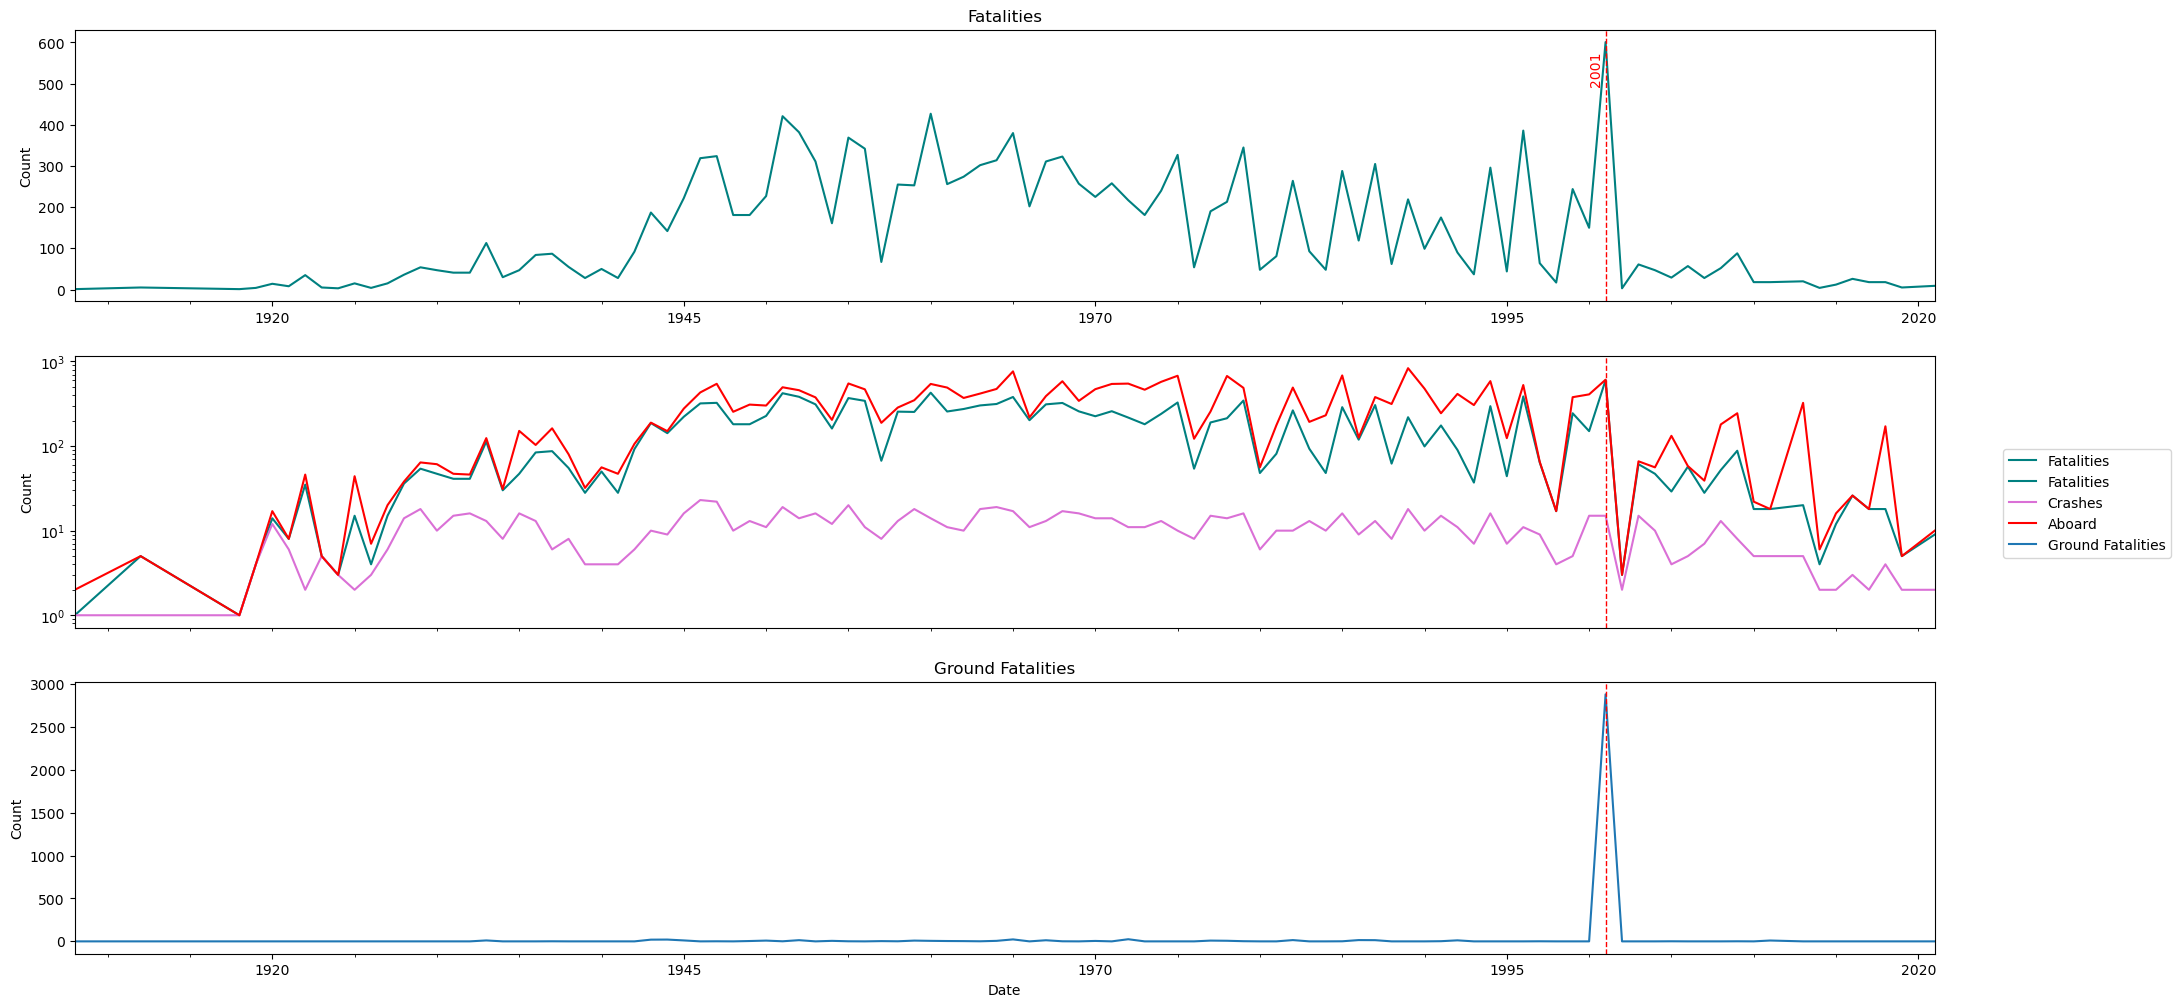

In [41]:
plot_(df_grouped_usa.agg(agg_me)["Fatalities_Total"],df_grouped_usa.agg(agg_me)["Country_Geopy"],df_grouped_usa.agg(agg_me)["Aboard_Total"],df_grouped_usa.agg(agg_me)["Ground"])

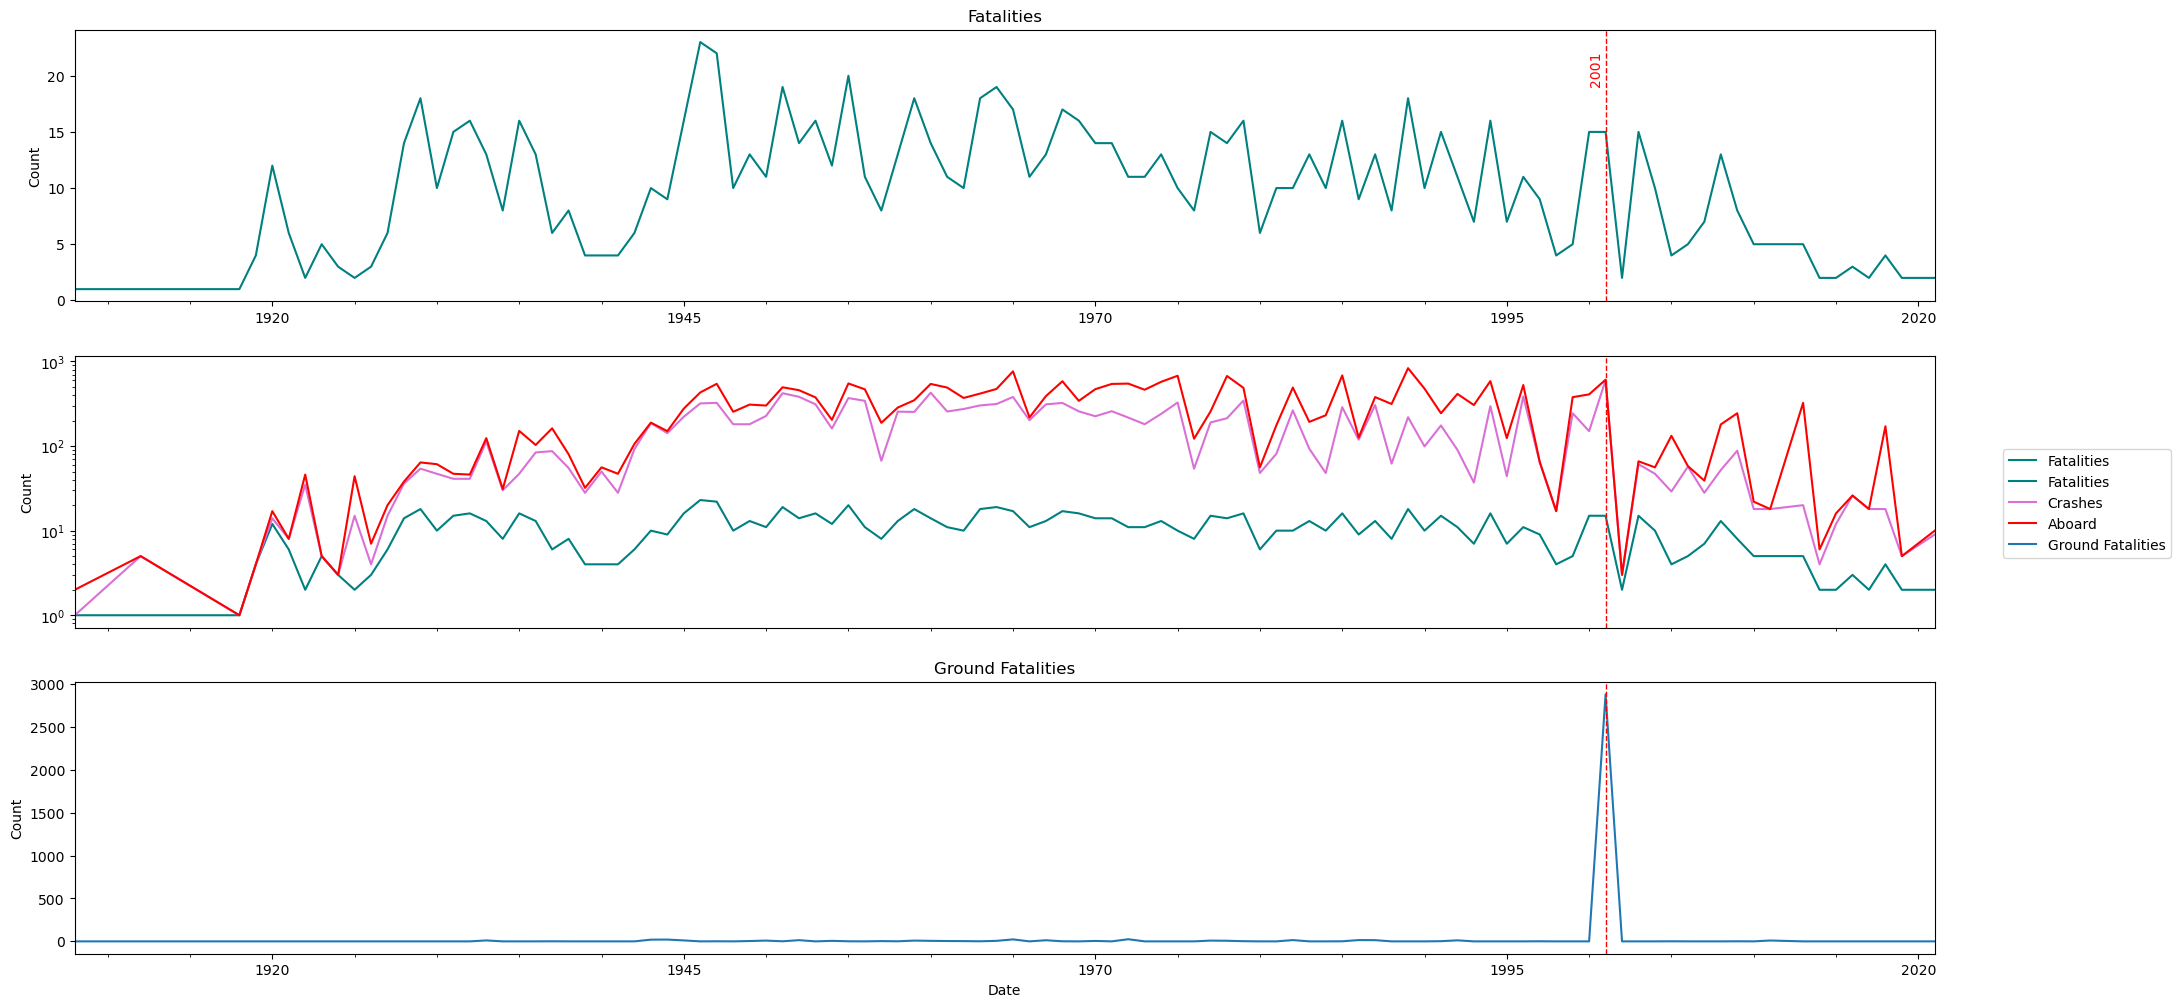

In [42]:
plot_(df_grouped_usa.agg(agg_me)["Country_Geopy"],df_grouped_usa.agg(agg_me)["Fatalities_Total"],df_grouped_usa.agg(agg_me)["Aboard_Total"],df_grouped_usa.agg(agg_me)["Ground"])

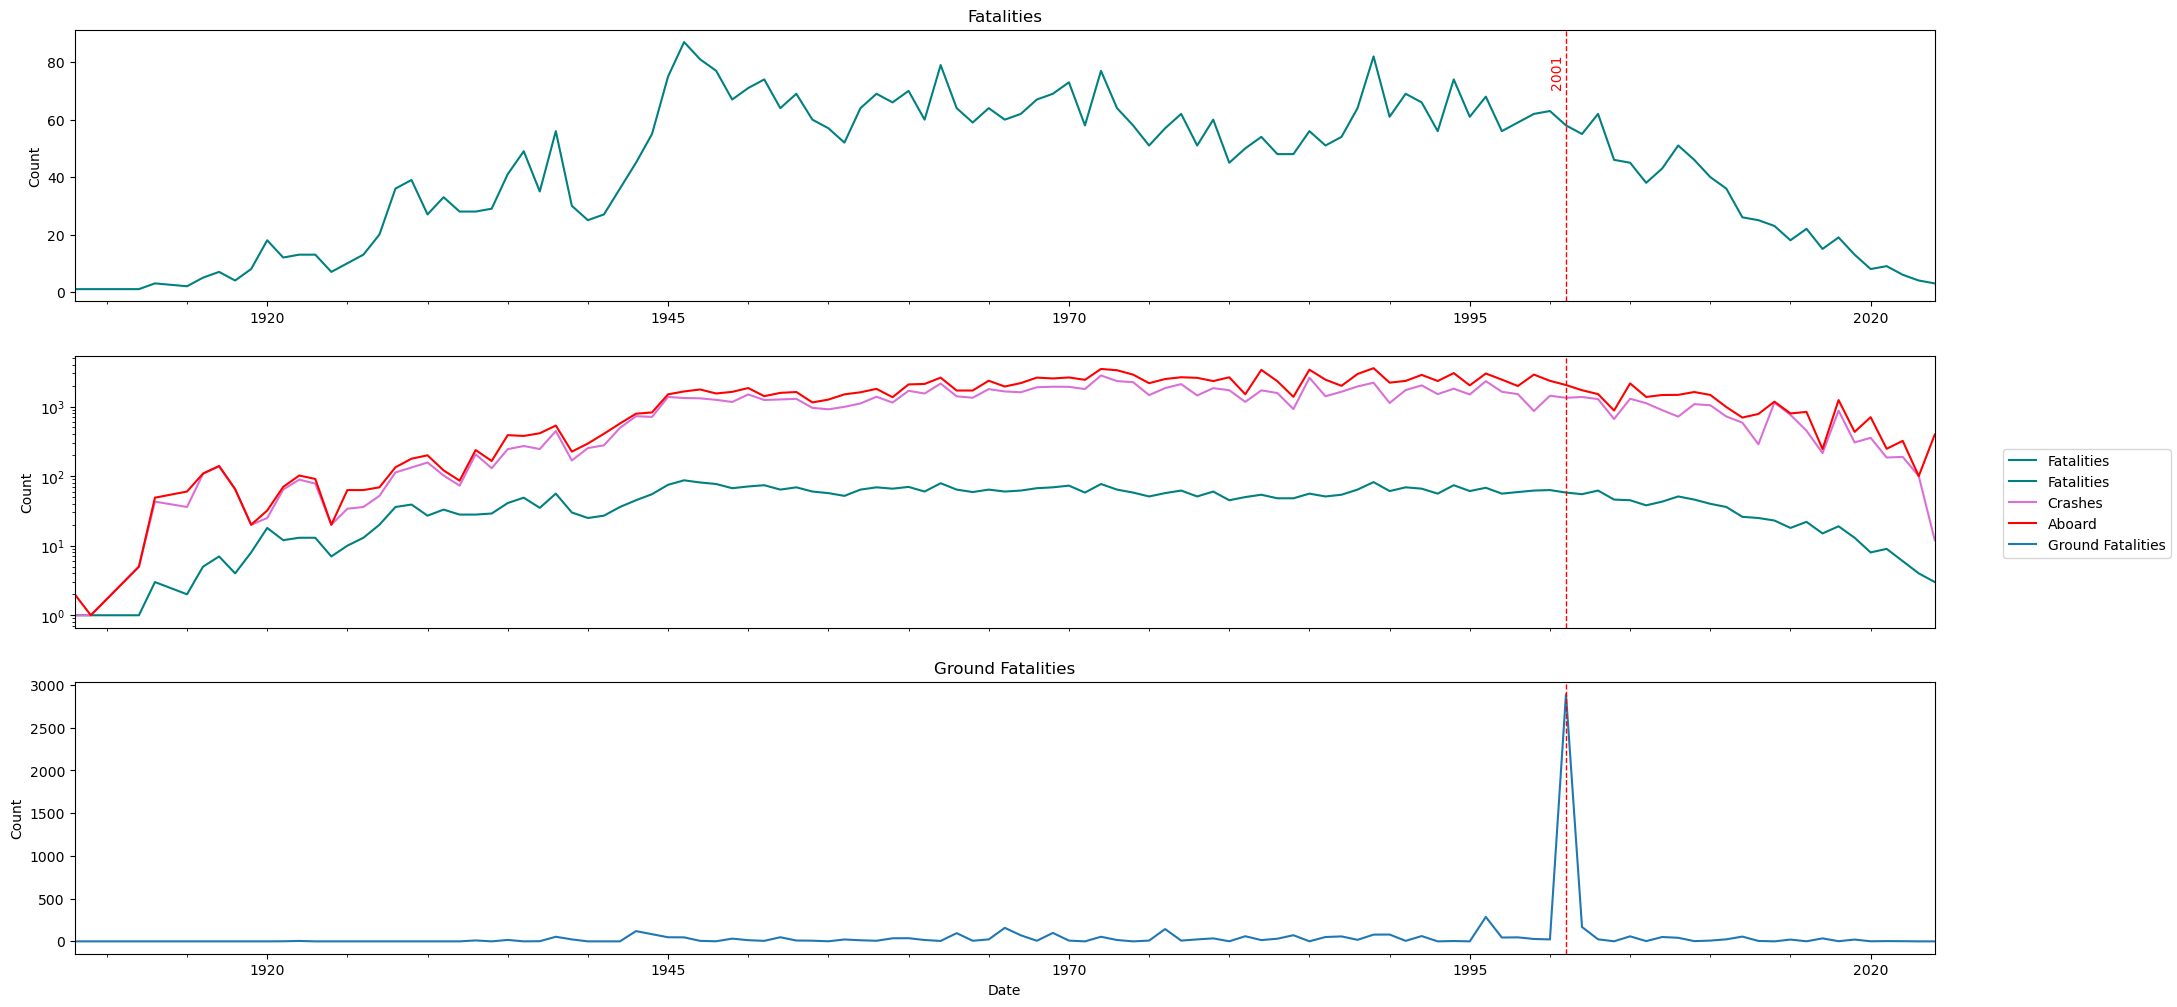

In [43]:
plot_(df_grouped.agg(agg_me)["Country_Geopy"],df_grouped.agg(agg_me)["Fatalities_Total"],df_grouped.agg(agg_me)["Aboard_Total"],df_grouped.agg(agg_me)["Ground"])

In [44]:
df_grouped_usa = df.groupby(df[df.Code == "USA"].Date.dt.to_period('Y'))